## Project : Loan Status Prediciton using SVM

### Work Flow:

1. Read Data
2. Data preprocesing and Visualization
3. Train the Model
4. Evaluate the Model
5. Build Predictive System

### Import python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
dataset = pd.read_csv("train.csv")
print(" Dataset IMported Successfully!!!!!!!!!!!!!")

 Dataset IMported Successfully!!!!!!!!!!!!!


## 1. Read Data :

1. Shape
2. Duplicate and Null Values
3. Descritpive Statisitcs


In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
dataset.shape

(480, 13)

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [10]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
dataset["Loan_Status"].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

## 2. Data preprocessing and Data Visualisation :

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset["Loan_Status"] = lb.fit_transform(dataset["Loan_Status"])

In [13]:
dataset["Loan_Status"].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [14]:
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [15]:
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
dataset = dataset.replace(to_replace="3+" , value=4)

In [17]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

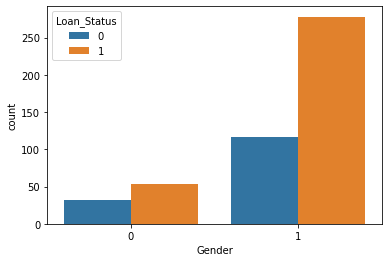

In [18]:
sns.countplot(x =dataset["Gender"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Married', ylabel='count'>

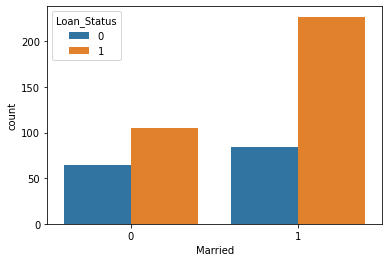

In [19]:
sns.countplot(x =dataset["Married"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Dependents', ylabel='count'>

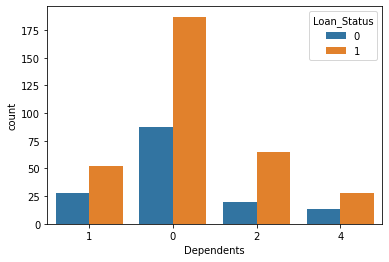

In [20]:
sns.countplot(x =dataset["Dependents"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Education', ylabel='count'>

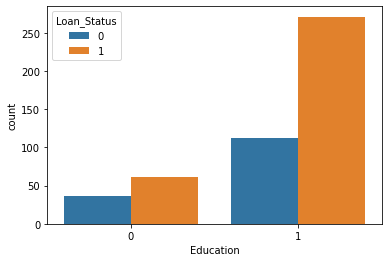

In [21]:
sns.countplot(x =dataset["Education"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

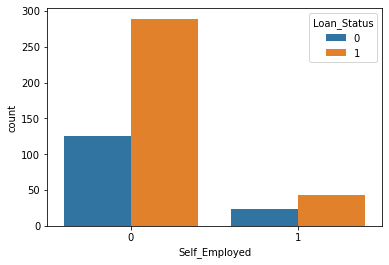

In [22]:
sns.countplot(x =dataset["Self_Employed"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

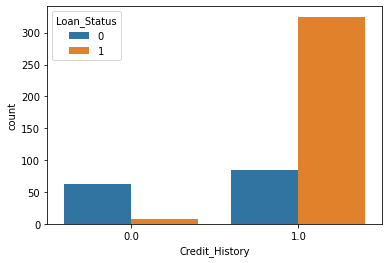

In [23]:
sns.countplot(x =dataset["Credit_History"] , hue= dataset["Loan_Status"] )

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

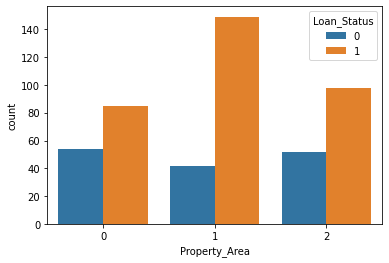

In [24]:
sns.countplot(x =dataset["Property_Area"] , hue= dataset["Loan_Status"] )

In [ ]:
# to plot with minimal codes

#featuers= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

#for f in featuers:
#    sns.countplot(x=f , data=dataset , hue= 'Loan_Status')
#    plt.title(f)
#    plt.show()

In [25]:
X = dataset.drop(["Loan_ID" ,"Loan_Status"] ,axis = 1 )

In [26]:
y = dataset["Loan_Status"]

In [27]:
X.shape , y.shape

((480, 11), (480,))

In [28]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## 3. Train the Model:

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [31]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((432, 11), (48, 11), (432,), (48,))

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(kernel="linear")
svc.fit(X_train ,y_train)

SVC(kernel='linear')

In [34]:
pred = svc.predict(X_test)

## 4. Evaluate the model:

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
print( " Accuracy of the Model :" , accuracy_score(y_test , pred)*100)

 Accuracy of the Model : 83.33333333333334


In [37]:
print(" Confusion Matrix : \n" , confusion_matrix(y_test,pred))

 Confusion Matrix : 
 [[ 9  6]
 [ 2 31]]


## 5. Build Predicitve System:

In [38]:
#Input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1) # Rejected

In [39]:
Input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2) # Approved

In [40]:
Input_data_as_array = np.asarray(Input_data)

In [41]:
Input_data_as_array.shape

(11,)

In [42]:
Input_data_as_array= Input_data_as_array.reshape(1,-1)

In [43]:
Input_data_as_array.shape

(1, 11)

In [44]:
Predict = svc.predict(Input_data_as_array)

In [45]:
print(Predict)

[1]


In [46]:
if (Predict[0]==0):
    print(" Loan Status in No ( Rejected )")
else:
    print(" Loan  Status is Yes ( Approved) ")

 Loan  Status is Yes ( Approved) 


In [47]:
print( "Congratulations !!!!!!!!!!!!!!!!!!!! You have completed this task...")

Congratulations !!!!!!!!!!!!!!!!!!!! You have completed this task...
